In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
#configure the dataset

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [3]:
!kaggle datasets download -d omkargurav/face-mask-dataset #api to fetch dataset from kaggle

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 89% 145M/163M [00:00<00:00, 220MB/s]
100% 163M/163M [00:00<00:00, 226MB/s]


In [4]:
#extractingthedataset
from zipfile   import ZipFile
dataset="/content/face-mask-dataset.zip"
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("the data set is extracted")

the data set is extracted


In [5]:
!ls

data  face-mask-dataset.zip  sample_data


In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [7]:
with_mask_file=os.listdir('/content/data/with_mask')
print((with_mask_file))


['with_mask_2911.jpg', 'with_mask_2411.jpg', 'with_mask_248.jpg', 'with_mask_2072.jpg', 'with_mask_212.jpg', 'with_mask_1689.jpg', 'with_mask_1383.jpg', 'with_mask_1624.jpg', 'with_mask_3141.jpg', 'with_mask_1502.jpg', 'with_mask_809.jpg', 'with_mask_1261.jpg', 'with_mask_301.jpg', 'with_mask_91.jpg', 'with_mask_2299.jpg', 'with_mask_2041.jpg', 'with_mask_2391.jpg', 'with_mask_3701.jpg', 'with_mask_1518.jpg', 'with_mask_1293.jpg', 'with_mask_2316.jpg', 'with_mask_3356.jpg', 'with_mask_254.jpg', 'with_mask_3358.jpg', 'with_mask_3424.jpg', 'with_mask_3355.jpg', 'with_mask_1716.jpg', 'with_mask_388.jpg', 'with_mask_2457.jpg', 'with_mask_3071.jpg', 'with_mask_1330.jpg', 'with_mask_627.jpg', 'with_mask_2908.jpg', 'with_mask_2640.jpg', 'with_mask_1217.jpg', 'with_mask_1525.jpg', 'with_mask_1617.jpg', 'with_mask_1278.jpg', 'with_mask_1942.jpg', 'with_mask_3211.jpg', 'with_mask_276.jpg', 'with_mask_2248.jpg', 'with_mask_746.jpg', 'with_mask_3230.jpg', 'with_mask_2532.jpg', 'with_mask_2507.jpg'

In [8]:
withought_mask_file=os.listdir('/content/data/without_mask')
print("print images withought_mask",(withought_mask_file))

print images withought_mask ['without_mask_345.jpg', 'without_mask_1805.jpg', 'without_mask_1281.jpg', 'without_mask_542.jpg', 'without_mask_3713.jpg', 'without_mask_2739.jpg', 'without_mask_3656.jpg', 'without_mask_185.jpg', 'without_mask_8.jpg', 'without_mask_1024.jpg', 'without_mask_3423.jpg', 'without_mask_3818.jpg', 'without_mask_1922.jpg', 'without_mask_2445.jpg', 'without_mask_2041.jpg', 'without_mask_2058.jpg', 'without_mask_3560.jpg', 'without_mask_314.jpg', 'without_mask_1728.jpg', 'without_mask_3358.jpg', 'without_mask_1905.jpg', 'without_mask_771.jpg', 'without_mask_2875.jpg', 'without_mask_1733.jpg', 'without_mask_1995.jpg', 'without_mask_3034.jpg', 'without_mask_1083.jpg', 'without_mask_691.jpg', 'without_mask_3777.jpg', 'without_mask_3709.jpg', 'without_mask_2417.jpg', 'without_mask_3399.jpg', 'without_mask_2671.jpg', 'without_mask_3396.jpg', 'without_mask_3512.jpg', 'without_mask_699.jpg', 'without_mask_1158.jpg', 'without_mask_3023.jpg', 'without_mask_3336.jpg', 'witho

In [9]:
#createlabel
#mask=1
#withoughtmask=0
with_mask_labels=[1]*3725
withought_mask_labels=[0]*3828



In [10]:
print(len(with_mask_labels))
print(len(withought_mask_labels))

3725
3828


In [11]:
labels=withought_mask_labels+with_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:0])

7553
[0, 0, 0, 0, 0]
[]


In [12]:
#displaying image of with mask
img0=mpimg.imread('/content/data/with_mask/with_mask_2911.jpg')
print(img0)

[[[117 103  90]
  [118 104  91]
  [120 106  93]
  ...
  [149 133 117]
  [186 170 154]
  [206 190 174]]

 [[122 108  95]
  [122 108  95]
  [123 109  96]
  ...
  [147 131 115]
  [179 163 147]
  [197 181 165]]

 [[136 123 107]
  [135 122 106]
  [135 122 106]
  ...
  [147 132 113]
  [175 160 141]
  [190 175 156]]

 ...

 [[232 253 255]
  [226 255 255]
  [203 249 255]
  ...
  [  3 121 171]
  [  4 126 175]
  [  2 129 180]]

 [[215 249 255]
  [201 247 255]
  [148 211 242]
  ...
  [  3 121 171]
  [  4 126 175]
  [  3 130 181]]

 [[204 246 255]
  [147 199 221]
  [ 74 144 178]
  ...
  [  2 120 170]
  [  4 126 175]
  [  4 131 182]]]


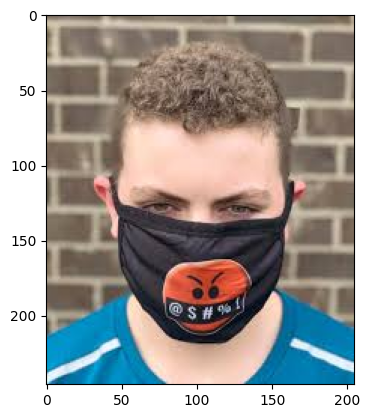

In [13]:
imgplot=plt.imshow(img0)

[[[ 18  22  23]
  [ 18  22  23]
  [ 17  20  25]
  ...
  [ 21  21  31]
  [ 17  17  27]
  [ 14  14  22]]

 [[ 17  21  22]
  [ 18  22  23]
  [ 17  20  25]
  ...
  [ 21  21  31]
  [ 19  19  29]
  [ 17  17  25]]

 [[ 16  20  21]
  [ 17  21  22]
  [ 17  20  25]
  ...
  [ 19  19  29]
  [ 19  19  29]
  [ 19  19  29]]

 ...

 [[ 13 137 137]
  [ 13 133 132]
  [ 15 131 128]
  ...
  [ 16  18  17]
  [ 15  17  16]
  [ 15  17  16]]

 [[  3 141 143]
  [  6 142 142]
  [  9 140 134]
  ...
  [ 13  17  18]
  [ 13  17  18]
  [ 13  17  18]]

 [[  1 146 149]
  [  3 147 147]
  [  8 145 138]
  ...
  [ 13  17  18]
  [ 13  17  18]
  [ 13  17  18]]]


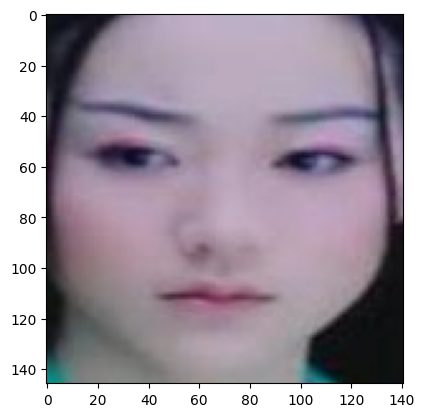

In [14]:
#displaying image of with mask
img1=mpimg.imread('/content/data/without_mask/without_mask_345.jpg')
print(img1)
plot_img=plt.imshow(img1)

In [15]:
#resize the image on same dimension for linear training
#1.rezize
#2. convert the images to numpy


In [16]:
#1
with_mask_path='/content/data/with_mask/'
data=[]
for img_files in with_mask_file:
  image=Image.open(with_mask_path+ img_files)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)
  #print(img_files)
  #2
withought_mask_path='/content/data/without_mask/'

for img_files in withought_mask_file:
  image=Image.open(withought_mask_path+ img_files)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)
 # print(img_files)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [17]:
  with_mask_path='/content/data/with_mask/'


In [18]:
!pip install pillow


In [19]:
print(len(data))
print(type(data))
print((data[0:4]))
print(type(data[0]))
data[0].shape

7553
<class 'list'>
[array([[[119, 105,  92],
        [121, 107,  93],
        [123, 109,  96],
        ...,
        [110,  95,  78],
        [152, 136, 120],
        [196, 180, 164]],

       [[145, 132, 116],
        [144, 131, 115],
        [143, 130, 114],
        ...,
        [119, 104,  85],
        [151, 136, 117],
        [185, 170, 151]],

       [[191, 178, 158],
        [190, 178, 157],
        [189, 176, 156],
        ...,
        [124, 110,  89],
        [147, 132, 112],
        [177, 162, 141]],

       ...,

       [[239, 243, 232],
        [231, 246, 249],
        [229, 248, 255],
        ...,
        [  3, 116, 163],
        [  4, 122, 171],
        [  2, 125, 175]],

       [[231, 252, 249],
        [209, 248, 255],
        [165, 212, 237],
        ...,
        [  1, 114, 162],
        [  3, 122, 172],
        [  2, 128, 178]],

       [[201, 242, 250],
        [121, 185, 213],
        [ 43, 119, 170],
        ...,
        [  0, 112, 160],
        [  2, 121, 170],
   

(128, 128, 3)

#converting labels and data into array


In [20]:
X=np.array(data)
Y=np.array(labels)
type(X)
print(Y.shape)


(7553,)


In [21]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [22]:
print(X.shape,X_train.shape,X_test.shape)
print(Y.shape,Y_train.shape,Y_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)
(7553,) (6042,) (1511,)


In [23]:
#scaling the data


In [24]:
X_train_scale=X_train/255
X_test_scale=X_test/255

In [25]:
X_train_scale[-1]

array([[[0.86666667, 0.88235294, 0.9254902 ],
        [0.86666667, 0.88235294, 0.9254902 ],
        [0.86666667, 0.88235294, 0.9254902 ],
        ...,
        [0.96862745, 0.97254902, 0.95294118],
        [0.96862745, 0.97254902, 0.95294118],
        [0.97254902, 0.97254902, 0.96470588]],

       [[0.8627451 , 0.87843137, 0.91372549],
        [0.8627451 , 0.87843137, 0.91372549],
        [0.8627451 , 0.87843137, 0.91372549],
        ...,
        [0.96862745, 0.96862745, 0.96078431],
        [0.96862745, 0.96862745, 0.96078431],
        [0.97254902, 0.97254902, 0.96862745]],

       [[0.85882353, 0.87058824, 0.90196078],
        [0.85882353, 0.87058824, 0.90196078],
        [0.85882353, 0.87058824, 0.90196078],
        ...,
        [0.96862745, 0.96862745, 0.96078431],
        [0.96862745, 0.96862745, 0.96078431],
        [0.97254902, 0.97254902, 0.96862745]],

       ...,

       [[0.63529412, 0.49019608, 0.37647059],
        [0.63921569, 0.49411765, 0.38431373],
        [0.64313725, 0

array([[[251, 255, 255],
        [252, 255, 255],
        [253, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[251, 255, 255],
        [252, 255, 255],
        [253, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[251, 255, 255],
        [252, 255, 255],
        [253, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
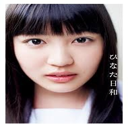

In [26]:


X_train[7]

building of cnn model


In [27]:
import tensorflow as tf
from tensorflow import keras

In [28]:
num_of_classes=2
model=keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))


model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes,activation='sigmoid'))




In [29]:
#compilethe model


In [30]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])


In [31]:
history=model.fit(X_train_scale,Y_train,validation_split=0.1,epochs=10  )

Epoch 1/10
170/170 [==============================] - 180s 1s/step - loss: 0.4928 - acc: 0.7809 - val_loss: 0.2999 - val_acc: 0.8777
Epoch 2/10
170/170 [==============================] - 158s 931ms/step - loss: 0.3231 - acc: 0.8740 - val_loss: 0.2950 - val_acc: 0.8860
Epoch 3/10
170/170 [==============================] - 156s 919ms/step - loss: 0.2847 - acc: 0.8878 - val_loss: 0.2559 - val_acc: 0.9107
Epoch 4/10
170/170 [==============================] - 156s 920ms/step - loss: 0.2587 - acc: 0.9009 - val_loss: 0.2411 - val_acc: 0.9223
Epoch 5/10
170/170 [==============================] - 162s 953ms/step - loss: 0.2312 - acc: 0.9130 - val_loss: 0.2396 - val_acc: 0.9157
Epoch 6/10
170/170 [==============================] - 160s 942ms/step - loss: 0.1984 - acc: 0.9264 - val_loss: 0.2301 - val_acc: 0.9306
Epoch 7/10
170/170 [==============================] - 157s 922ms/step - loss: 0.1665 - acc: 0.9386 - val_loss: 0.2433 - val_acc: 0.9140
Epoch 8/10
170/170 [==============================]

In [32]:
loss,accuracy=model.evaluate(X_test_scale,Y_test)
print(accuracy)

48/48 [==============================] - 17s 357ms/step - loss: 0.3359 - acc: 0.8987
0.8987425565719604


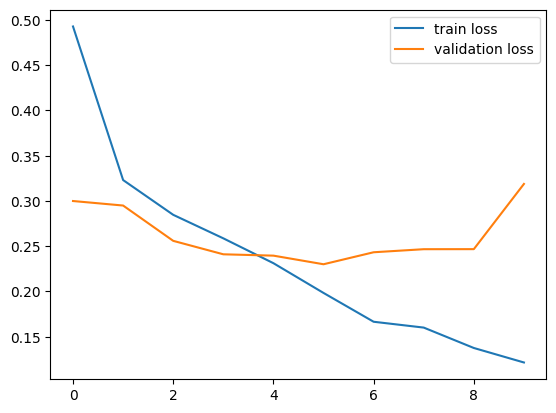

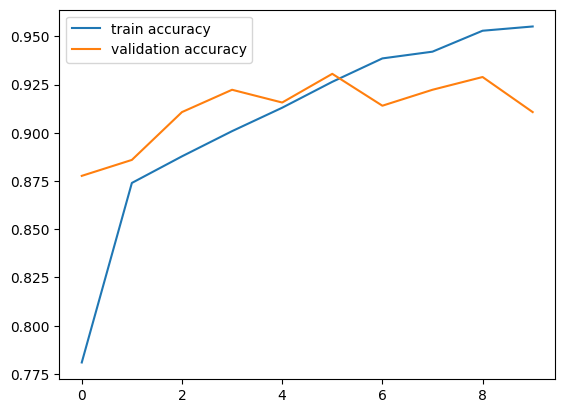

In [33]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted: /content/Face-Mask-PNG-Image-Transparent-Background-390442960.png


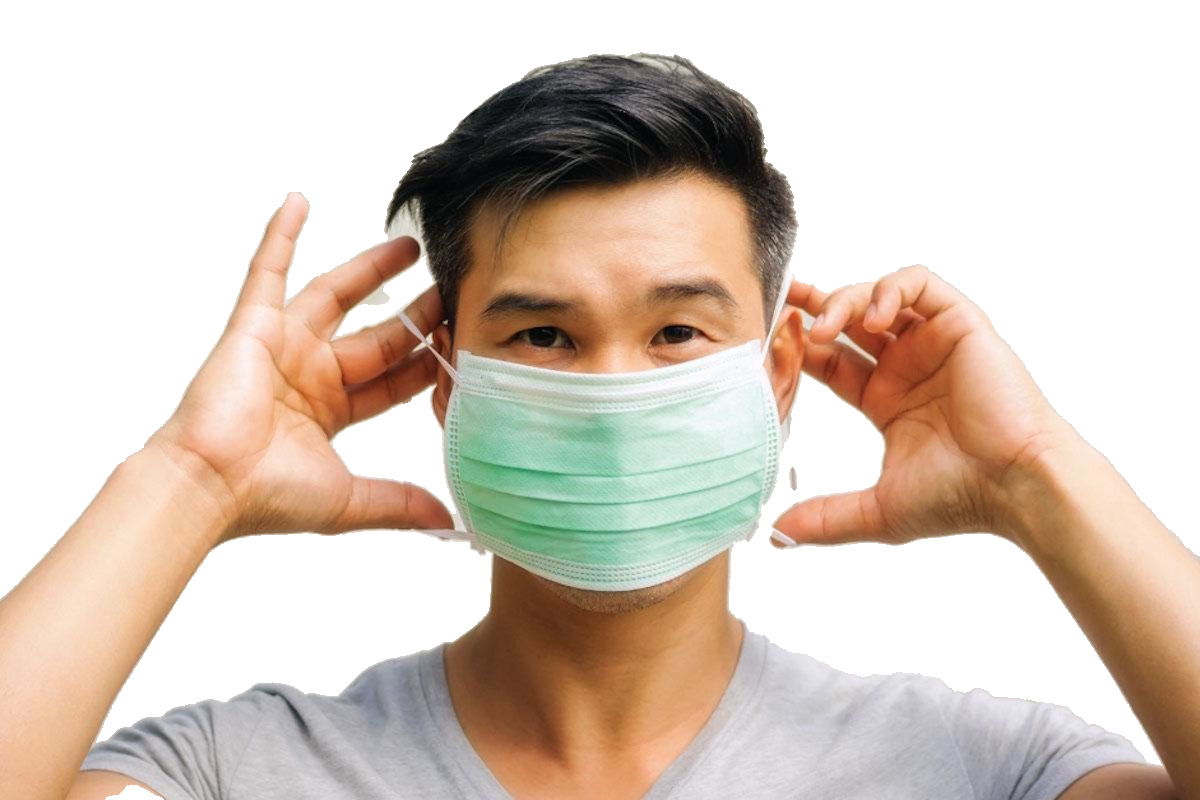

1/1 [==============================] - 0s 51ms/step
[[0.46100903 0.46781403]]
1
The person in the image is wearing a mask


In [35]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')